
## Let's Build Our Next Model Using Fine Transfer Learning




In [81]:
from Helper import Helper

In [82]:
h = Helper("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip")

[]
2 -- 0 at 10_food_classes_10_percent
10 -- 0 at 10_food_classes_10_percent/test
0 -- 250 at 10_food_classes_10_percent/test/ice_cream
0 -- 250 at 10_food_classes_10_percent/test/steak
0 -- 250 at 10_food_classes_10_percent/test/ramen
0 -- 250 at 10_food_classes_10_percent/test/sushi
0 -- 250 at 10_food_classes_10_percent/test/grilled_salmon
0 -- 250 at 10_food_classes_10_percent/test/pizza
0 -- 250 at 10_food_classes_10_percent/test/chicken_curry
0 -- 250 at 10_food_classes_10_percent/test/chicken_wings
0 -- 250 at 10_food_classes_10_percent/test/hamburger
0 -- 250 at 10_food_classes_10_percent/test/fried_rice
10 -- 0 at 10_food_classes_10_percent/train
0 -- 75 at 10_food_classes_10_percent/train/ice_cream
0 -- 75 at 10_food_classes_10_percent/train/steak
0 -- 75 at 10_food_classes_10_percent/train/ramen
0 -- 75 at 10_food_classes_10_percent/train/sushi
0 -- 75 at 10_food_classes_10_percent/train/grilled_salmon
0 -- 75 at 10_food_classes_10_percent/train/pizza
0 -- 75 at 10_food_cla

In [83]:
class_names = h.get_classnames()

In [84]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

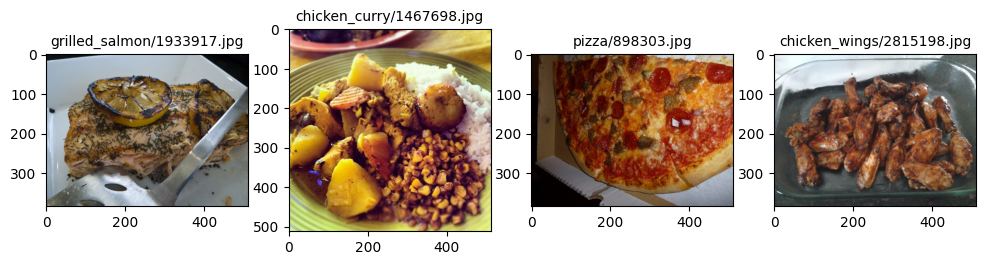

In [85]:
h.view_random_train_image()

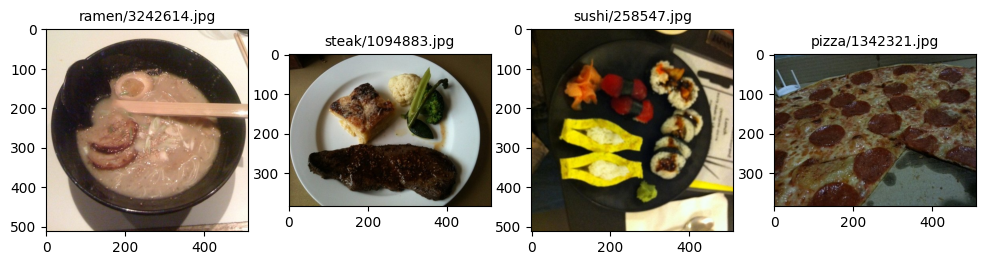

In [86]:
h.view_random_test_image()

In [87]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [88]:
from tensorflow.keras.metrics import  Accuracy

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [90]:
# Import the data

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                         image_size = (224,224),
                                                         batch_size=32,
                                                         shuffle=True,
                                                         label_mode='categorical')

test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                       image_size = (224,224),
                                                       color_mode='rgb',
                                                       shuffle=False,
                                                       label_mode='categorical')



Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [91]:
train_data, test_data

# None is the batch size

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>)

In [92]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [93]:
import matplotlib.pyplot as plt
for imgs, labels in train_data.take(2):
  print(imgs, labels)

tf.Tensor(
[[[[3.50000000e+01 3.10000000e+01 2.80000000e+01]
   [3.59540825e+01 3.19540825e+01 2.89540825e+01]
   [3.70000000e+01 3.30000000e+01 3.00000000e+01]
   ...
   [4.22142639e+01 4.02142639e+01 4.12142639e+01]
   [4.03316269e+01 3.83316269e+01 3.93316269e+01]
   [3.92295799e+01 3.72295799e+01 3.82295799e+01]]

  [[3.60000000e+01 3.20000000e+01 2.90000000e+01]
   [3.60663261e+01 3.20663261e+01 2.90663261e+01]
   [3.72704086e+01 3.32704086e+01 3.02704086e+01]
   ...
   [4.22703896e+01 4.02703896e+01 4.12703896e+01]
   [4.10663261e+01 3.90663261e+01 4.00663261e+01]
   [4.00714302e+01 3.80714302e+01 3.90714302e+01]]

  [[3.67857132e+01 3.27857132e+01 2.97857132e+01]
   [3.69846954e+01 3.29846954e+01 2.99846935e+01]
   [3.81683693e+01 3.41683693e+01 3.11683674e+01]
   ...
   [4.30000000e+01 4.10000000e+01 4.20000000e+01]
   [4.19846916e+01 3.99846916e+01 4.09846916e+01]
   [4.17857132e+01 3.97857132e+01 4.07857132e+01]]

  ...

  [[1.00000000e+01 1.00000000e+01 1.00000000e+01]
   [1

### Create a model using tensorflow applications

In [94]:
import datetime
def create_callbacks(dir_name, exp_name):
  '''
  Accepts:
    dir_name
    exp_name : where dumps the logs
  '''
  log_dir = dir_name + "/" + exp_name + "_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensor_callbacks = tf.keras.callbacks.TensorBoard(log_dir="./logs" )
  print(f"Dumping into the dir {log_dir}")
  return tensor_callbacks



In [95]:
tf.random.set_seed(42)

# Create a base model using tensorflow application
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)


base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="Input Layer")

# Rescaling is pre-built in Efficientnet

x = base_model(inputs)

print(f"Input Shape after Base Model is {x.shape}")

# Apply GlobalAveragePooling to reduce the dimension

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

print(f"Input Shape after pooling is {x.shape}")

# Create Output Layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name='Output_Layer') (x)

print(f"Output Shape is {outputs.shape}")

# Combine inputs and output with model

model0 = tf.keras.Model(inputs, outputs)

# Model Compilation

model0.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = "adam",
               metrics=['accuracy'])

# Model Fitting
history0 = model0.fit(train_data,
                      epochs=10,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data),
                      callbacks=[create_callbacks("Efficientv2B0", "10_per_data")])

Input Shape after Base Model is (None, 7, 7, 1280)
Input Shape after pooling is (None, 1280)
Output Shape is (None, 10)
Dumping into the dir Efficientv2B0/10_per_data_20230826-114324
Epoch 1/10
24/24 [==============================] - 18s 373ms/step - loss: 1.9256 - accuracy: 0.4120 - val_loss: 1.3738 - val_accuracy: 0.7416
Epoch 2/10
24/24 [==============================] - 9s 355ms/step - loss: 1.1386 - accuracy: 0.7773 - val_loss: 0.9056 - val_accuracy: 0.8224
Epoch 3/10
24/24 [==============================] - 8s 341ms/step - loss: 0.8292 - accuracy: 0.8307 - val_loss: 0.7177 - val_accuracy: 0.8432
Epoch 4/10
24/24 [==============================] - 7s 295ms/step - loss: 0.6769 - accuracy: 0.8560 - val_loss: 0.6217 - val_accuracy: 0.8532
Epoch 5/10
24/24 [==============================] - 8s 337ms/step - loss: 0.5780 - accuracy: 0.8760 - val_loss: 0.5625 - val_accuracy: 0.8636
Epoch 6/10
24/24 [==============================] - 8s 345ms/step - loss: 0.5123 - accuracy: 0.8880 - val_

In [96]:
for layers_num, layers in enumerate(base_model.layers):
  print(layers_num, layers.name)

0 input_10
1 rescaling_9
2 normalization_9
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 

In [97]:
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_9 (Rescaling)        (None, None, None,   0           ['input_10[0][0]']               
                                3)                                                                
                                                                                                  
 normalization_9 (Normalization  (None, None, None,   0          ['rescaling_9[0][0]']            
 )                              3)                                                

In [98]:
model0.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 Output_Layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________


### Notes
 - **Bottleneck layers reduce the number of neurons or channels intentionally to compress information.**

 -  **Dropout sets a fraction of neurons' outputs to zero during training to prevent overfitting and improve network robustness.**

In [99]:
def plot_the_graph(hist):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Accuracy vs Val Accuracy")
  plt.plot(hist.history['accuracy'], label="accuracy")
  plt.plot(hist.history['val_accuracy'], label='val_accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.title('Loss vs Val Loss')
  plt.plot(hist.history['loss'], label="loss")
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.legend()


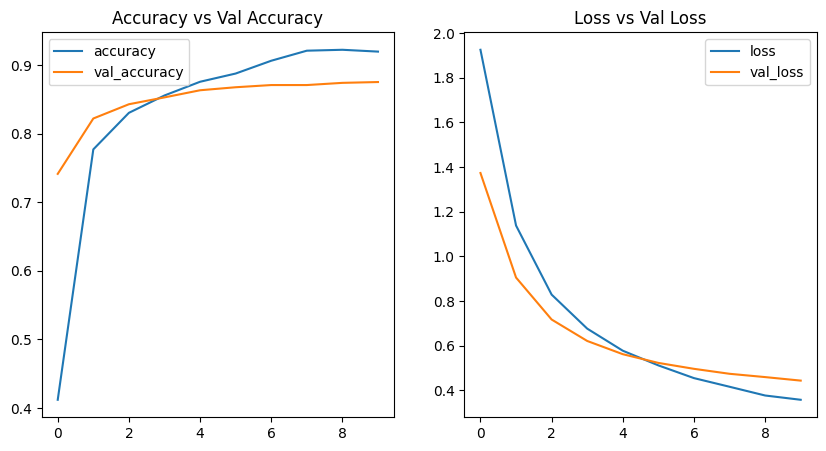

In [100]:
plot_the_graph(history0)

In [101]:
import random as rd
import os
from PIL import Image
def prepareData(img_path):
  img = Image.open(img_path).convert("RGB")
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  return img

def predict_plot(model, path="10_food_classes_10_percent/test/"):
  plt.figure(figsize=(20,6))
  for i in range(6):
      plt.subplot(1,6,i+1)
      path="10_food_classes_10_percent/test/"
      dir_choice  =  os.listdir(path)
      food_class = dir_choice[rd.randint(0,len(dir_choice)-1)]
      path += food_class + "/"
      img_choice = os.listdir(path)
      path += img_choice[rd.randint(0,len(img_choice)-1)]
      samp_ = prepareData(path)
      samp = tf.expand_dims(samp_, axis=0)
      pred_ = int((model.predict(samp).argmax()))
      pred_class = class_names[pred_]
      # if pred_class == food_class:
      #   plt.title(f"{class_names[pred_]}", c='g')
      # else:
      #   plt.title(f"{pred_class}", c='r')
      plt.imshow(samp_)

1/1 [==============================] - 0s 27ms/step


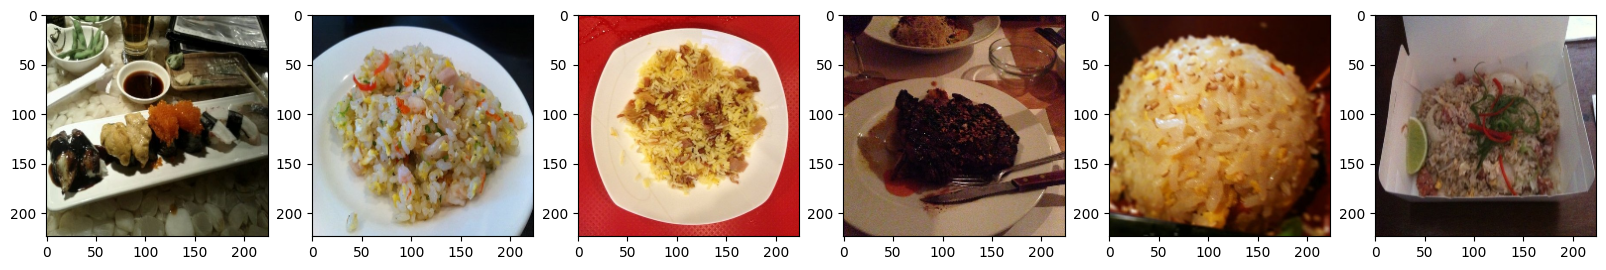

In [102]:
predict_plot(model0)

In [103]:
def prepareData(img_path):
  img = Image.open(img_path).convert("RGB")
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  return img

1/1 [==============================] - 0s 27ms/step


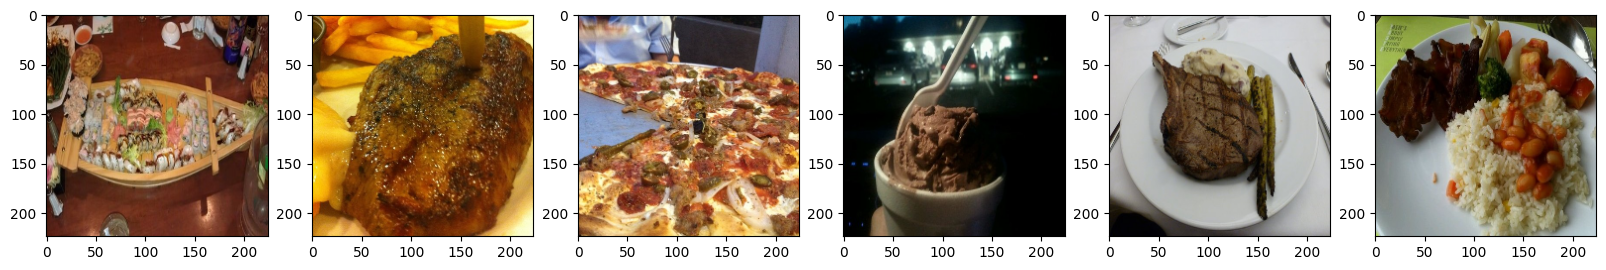

In [104]:
model = model0
plt.figure(figsize=(20,6))
for i in range(6):
    plt.subplot(1,6,i+1)
    path="10_food_classes_10_percent/test/"
    dir_choice  =  os.listdir(path)
    food_class = dir_choice[rd.randint(0,len(dir_choice)-1)]
    path += food_class + "/"
    img_choice = os.listdir(path)
    path += img_choice[rd.randint(0,len(img_choice)-1)]
    samp_ = prepareData(path)
    samp = tf.expand_dims(samp_, axis=0)
    pred_ = int((model.predict(samp).argmax()))
    pred_class = class_names[pred_]
    # if pred_class == food_class:
    #   plt.title(f"{class_names[pred_]}", c='g')
    # else:
    #   plt.title(f"{pred_class}", c='r')
    plt.imshow(samp_)

**Global Average Pooling 2D ** - redcues the dimension of the tensor.

How the model works

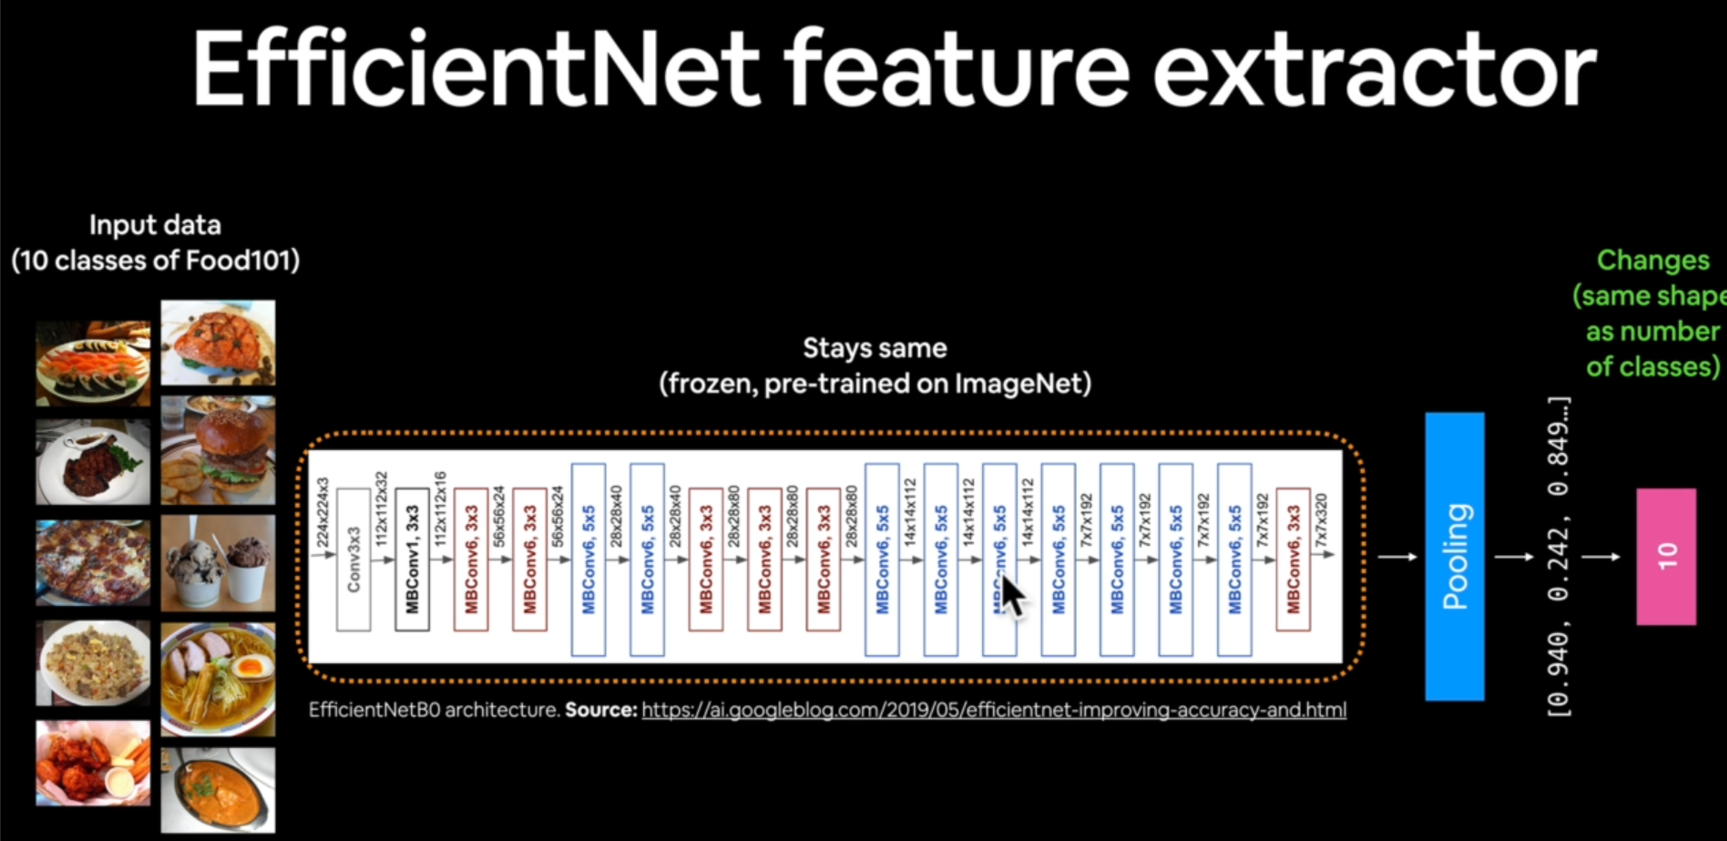

**If a tensor shape is (1,4,5,3). After GlobalAvgeragePooling, it will changed to (1,3). The inner axes are removed.**

   From Input Layer , the model are trained i.e. pass through many neurons. So, it needs to revert back to original state. After applying pooling, the model can be trained according to requirements after passing through dense layer(the no of neurons on the last dense layer depends on the no of classes, we are delaing with).  

   For Binary Classification -> the last dense layer has 2 neurons
   For Multiclass Classification -> the neurons depends on the class

In [105]:
input_shape = (1,2,4,3)

tf.random.set_seed(42)

temp = tf.random.uniform(input_shape)

tf.keras.layers.GlobalAveragePooling2D()(temp)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.5382011 , 0.31524014, 0.5610231 ]], dtype=float32)>

In [106]:
temp

<tf.Tensor: shape=(1, 2, 4, 3), dtype=float32, numpy=
array([[[[0.6645621 , 0.44100678, 0.3528825 ],
         [0.46448255, 0.03366041, 0.68467236],
         [0.74011743, 0.8724445 , 0.22632635],
         [0.22319686, 0.3103881 , 0.7223358 ]],

        [[0.13318717, 0.5480639 , 0.5746088 ],
         [0.8996835 , 0.00946367, 0.5212307 ],
         [0.6345445 , 0.1993283 , 0.72942245],
         [0.54583454, 0.10756552, 0.6767061 ]]]], dtype=float32)>

In [107]:
tf.reduce_mean(temp, axis=[1,2]) # Applies mean in the axis 1, 2

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.5382011 , 0.31524014, 0.5610231 ]], dtype=float32)>

In [108]:
# Let's Create an another Model

In [109]:
# Add data augmentation layer -> why need to add ?

# adding data augmentation in layer, saves the layer to the model

In [110]:
# Data Augmentation

from tensorflow import keras
from tensorflow.keras import layers
data_aug_layer = Sequential([
    layers.RandomFlip(mode='horizontal'),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
], name="Data_Aug")

In [111]:
# We need to pass data

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_data_aug = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                             label_mode='categorical',
                                                             batch_size = 32,
                                                             image_size=(224,224))

test_data_aug = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                            label_mode='categorical',
                                                            shuffle=False,
                                                            image_size=(224,224)
                                                            )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [112]:
# view the data
import matplotlib.image as mpimg
def view_aug_img(path="10_food_classes_10_percent/train/"):

    path="10_food_classes_10_percent/train/"
    names_ = sorted([_ for _ in os.listdir(path)])
    choices = rd.randint(0, len(names_) - 1)
    path = path + names_[choices]
    file_names = [_ for _ in os.listdir(path)]
    choices = rd.randint(0, len(file_names) - 1)
    path = path + "/" + file_names[choices]
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    img = mpimg.imread(path) / 255.
    plt.imshow(img)
    plt.title(f"Normal : {file_names[choices]}")
    plt.axis(False)
    aug_img = data_aug_layer(tf.expand_dims(img, axis=0)) # For passing into layer, we need to expand_the dimension
    aug_img = tf.squeeze(aug_img) # We need to reduce the dimension to plot
    plt.subplot(1,2,2)
    plt.imshow(aug_img)
    plt.title(f"Augmented : {file_names[choices]}")
    plt.axis(False)

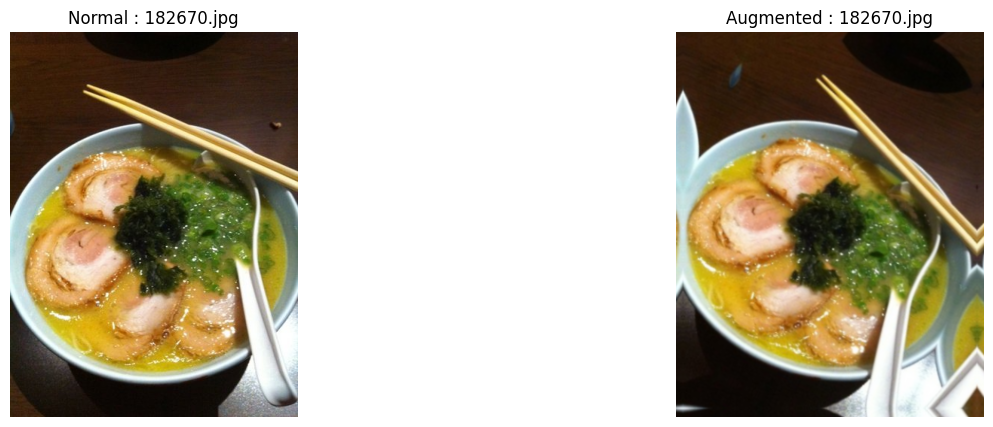

In [113]:
view_aug_img()

**Let's Create a base model**

In [114]:
# Model Checkpoint

create_model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="10_percent_data_checkpoint/checkpoint.ckpt",
                                                             save_weights_only=True,
                                                             save_freq="epoch",
                                                             save_best_only = True,
                                                             verbose=1)

In [115]:
# Create a base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

# Freeze the model
base_model.trainable = False


inputs = tf.keras.layers.Input(shape=(224,224,3), name="Input_Layer")
# Link the layers

x = data_aug_layer(inputs)

x = base_model(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_avg_pool") (x)

outputs = tf.keras.layers.Dense(len(class_names), activation="softmax",name = "Output_Layer") (x)

# Link Input & Output
model1 = tf.keras.Model(inputs, outputs)

# Model Compilation

model1.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate =0.001), # 10 times less than default
               metrics=['accuracy'])

# Model Fitting
initial_epoch = 10
history1 = model1.fit(train_data_aug,
                      epochs = initial_epoch ,
                      steps_per_epoch = len(train_data_aug),
                      validation_data = test_data_aug,
                      validation_steps=int((0.25) * len(test_data_aug)),
                      callbacks=[create_callbacks("EfficientNet", "10_per_data"), create_model_checkpoint])

Dumping into the dir EfficientNet/10_per_data_20230826-114516
Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 2.0430 - accuracy: 0.2987
Epoch 1: val_loss improved from inf to 1.70948, saving model to 10_percent_data_checkpoint/checkpoint.ckpt
24/24 [==============================] - 22s 563ms/step - loss: 2.0430 - accuracy: 0.2987 - val_loss: 1.7095 - val_accuracy: 0.4326
Epoch 2/10
24/24 [==============================] - ETA: 0s - loss: 1.4549 - accuracy: 0.5947
Epoch 2: val_loss improved from 1.70948 to 1.29817, saving model to 10_percent_data_checkpoint/checkpoint.ckpt
24/24 [==============================] - 11s 431ms/step - loss: 1.4549 - accuracy: 0.5947 - val_loss: 1.2982 - val_accuracy: 0.5905
Epoch 3/10
24/24 [==============================] - ETA: 0s - loss: 1.1548 - accuracy: 0.7120
Epoch 3: val_loss improved from 1.29817 to 1.08650, saving model to 10_percent_data_checkpoint/checkpoint.ckpt
24/24 [==============================] - 9s 347ms/step - loss: 

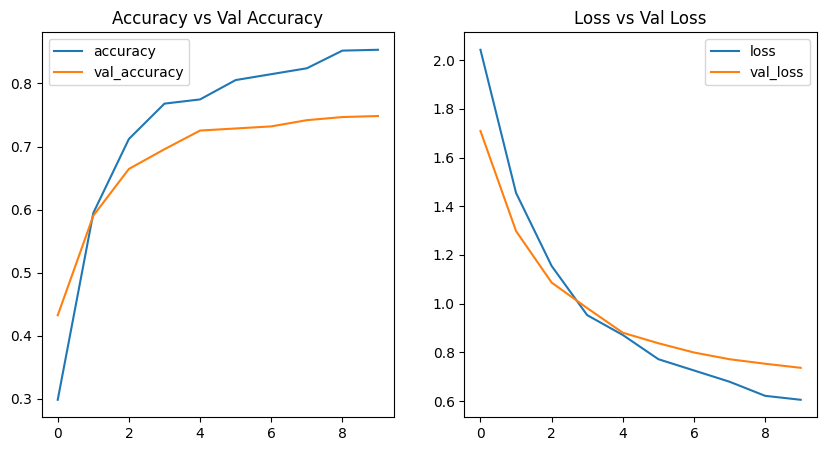

In [116]:
plot_the_graph(history1)

In [117]:
len(class_names)

10

In [119]:
history1_evaluate = model1.evaluate(test_data_aug)

79/79 [==============================] - 10s 127ms/step - loss: 0.5170 - accuracy: 0.8472


In [121]:
model1.load_weights("10_percent_data_checkpoint/checkpoint.ckpt")

In [122]:
model1.evaluate(test_data_aug)

79/79 [==============================] - 8s 100ms/step - loss: 0.5170 - accuracy: 0.8472


[0.5170283913612366, 0.8471999764442444]

In [123]:
model1.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_Aug (Sequential)       (None, None, None, 3)     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_avg_pool (GlobalAver  (None, 1280)             0         
 agePooling2D)                                                   
                                                                 
 Output_Layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-traina

In [127]:
for indx, layer in enumerate(model1.layers):
  print(indx,layer.name, layer.trainable)

0 Input_Layer True
1 Data_Aug True
2 efficientnetv2-b0 False
3 global_avg_pool True
4 Output_Layer True


In [131]:
for indx, layer in enumerate(base_model.layers[-12:]):
  print(indx, layer.name , layer.trainable==True)

0 block6h_se_squeeze False
1 block6h_se_reshape False
2 block6h_se_reduce False
3 block6h_se_expand False
4 block6h_se_excite False
5 block6h_project_conv False
6 block6h_project_bn False
7 block6h_drop False
8 block6h_add False
9 top_conv False
10 top_bn False
11 top_activation False


In [136]:
for indx, layer in enumerate(model1.layers[2].layers):
  print(indx, layer.name, layer.trainable)

0 input_11 False
1 rescaling_10 False
2 normalization_10 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwcon

In [137]:
# Let's Create another model

In [138]:
model2 = tf.keras.models.clone_model(model1)

In [139]:
model2.predict(test_data_aug)

79/79 [==============================] - 12s 94ms/step


array([[0.09900557, 0.10027223, 0.09890109, ..., 0.09992498, 0.09995169,
        0.09927331],
       [0.09901153, 0.09975929, 0.09961261, ..., 0.09992224, 0.09981465,
        0.09984691],
       [0.09818324, 0.10024802, 0.0992886 , ..., 0.10052107, 0.09997764,
        0.09920741],
       ...,
       [0.09909599, 0.09993713, 0.0997135 , ..., 0.09992711, 0.09997973,
        0.10010276],
       [0.09633648, 0.10135628, 0.09810653, ..., 0.09977903, 0.09943638,
        0.09696293],
       [0.09931053, 0.09974635, 0.0997593 , ..., 0.09988732, 0.09996861,
        0.10022435]], dtype=float32)

In [144]:
model2.evaluate(test_data_aug)

RuntimeError: ignored

In [141]:
model2.load_weights("10_percent_data_checkpoint/checkpoint.ckpt")

In [145]:
model2.evaluate(test_data_aug)

RuntimeError: ignored

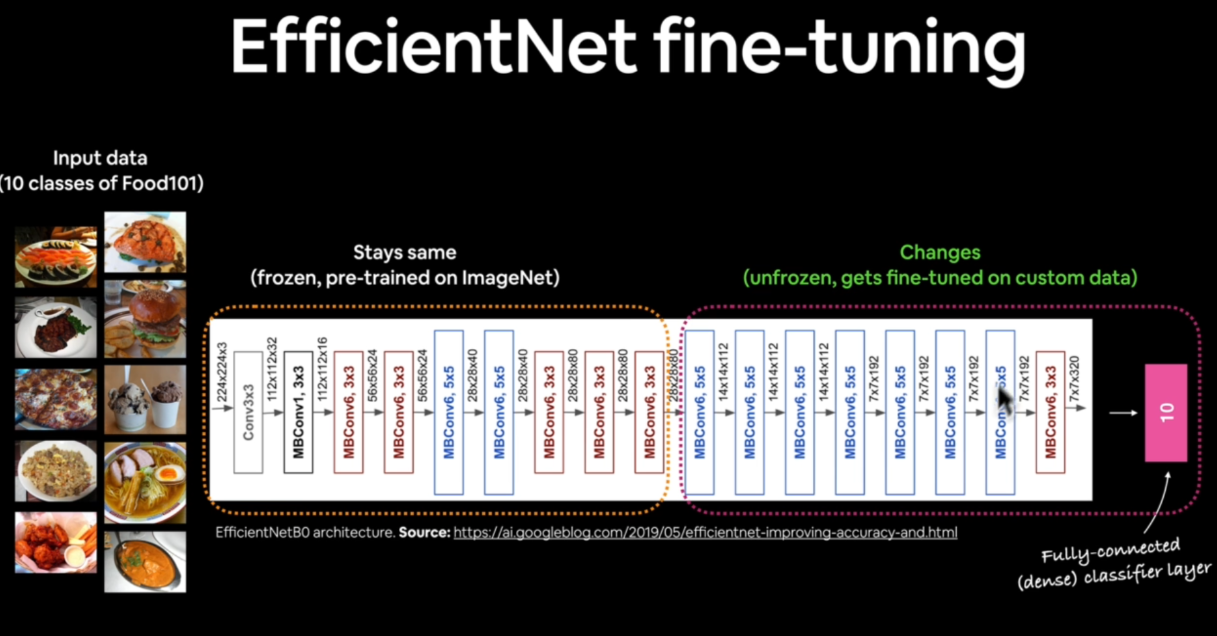

In [147]:
model2_base_model = model1.layers[2]

In [164]:
for layer_number, layer in enumerate(model2_base_model.layers):
  print(layer_number, layer.name, layer.trainable)


0 input_11 False
1 rescaling_10 False
2 normalization_10 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwcon

In [167]:
# Unfreeze all the layers of a base model
model2_base_model.training = True

# Freeze all the layers except the last 10 layers

for indx, layer in enumerate(model2_base_model.layers[:-10]):
  layer.trainable = False

# Re-compile the model (Need to compile the model whenever we make changes)
model2.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0091),
               metrics=['accuracy'])

In [169]:
for indx, layer in enumerate(model2_base_model.layers):
  print(indx, layer.name , layer.trainable)

0 input_11 False
1 rescaling_10 False
2 normalization_10 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwcon